In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap

In [352]:
df=pd.read_csv('supermarket_sales - Sheet1.csv')
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [353]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [354]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3
2019-03-25,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,18:30,Ewallet,597.73,4.761905,29.8865,4.1
2019-02-25,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,14:36,Ewallet,413.04,4.761905,20.6520,5.8
2019-02-24,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,11:38,Ewallet,735.60,4.761905,36.7800,8.0
2019-01-10,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,17:15,Credit card,72.52,4.761905,3.6260,7.2


In [355]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

C:\Users\Usuario\AppData\Local\Temp\ipykernel_44744\185801935.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


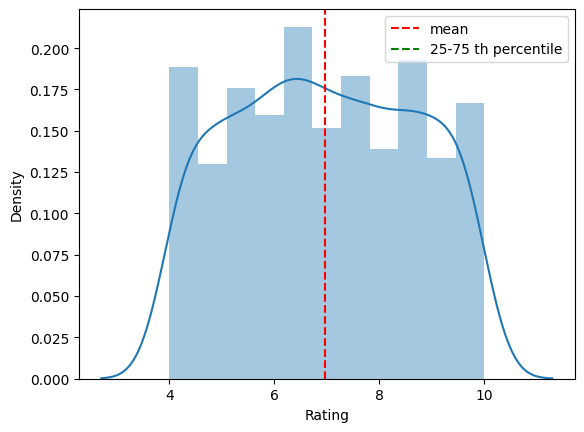

In [356]:
# Lets take a first glance at the distributions
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']),c='red',ls='--', label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green',ls='--',label='25-75 th percentile')
plt.axvline(x=np.percentile(df['Rating'],75),c='green',ls='--')
plt.legend(loc='upper right')

array([[<AxesSubplot: title={'center': 'Unit price'}>,
        <AxesSubplot: title={'center': 'Quantity'}>,
        <AxesSubplot: title={'center': 'Tax 5%'}>],
       [<AxesSubplot: title={'center': 'Total'}>,
        <AxesSubplot: title={'center': 'cogs'}>,
        <AxesSubplot: title={'center': 'gross margin percentage'}>],
       [<AxesSubplot: title={'center': 'gross income'}>,
        <AxesSubplot: title={'center': 'Rating'}>, <AxesSubplot: >]],
      dtype=object)

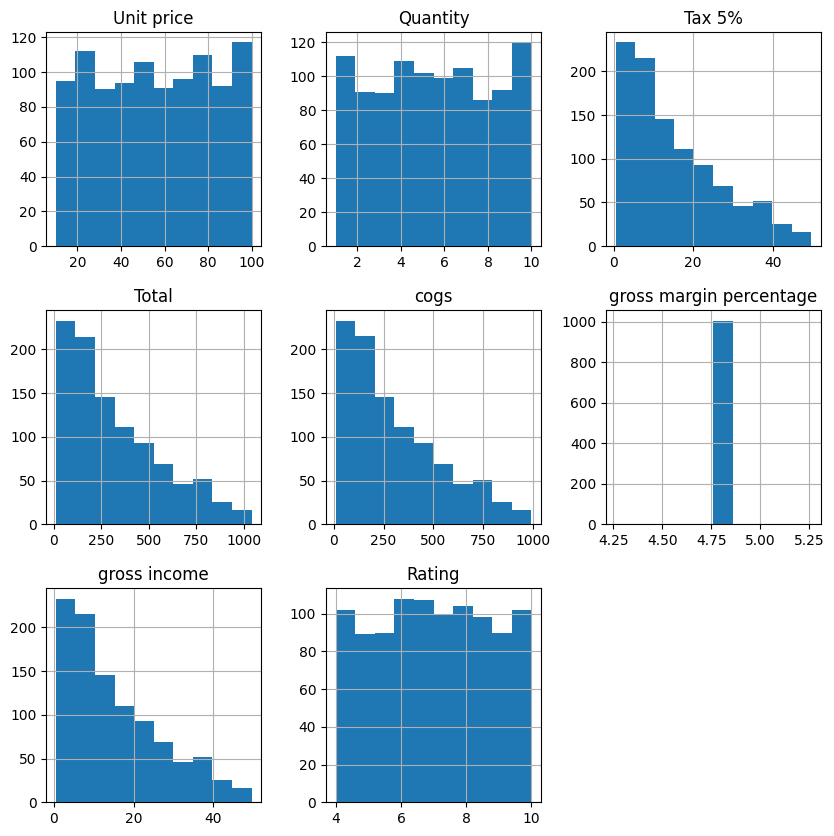

In [357]:
df.hist(figsize=(10,10))

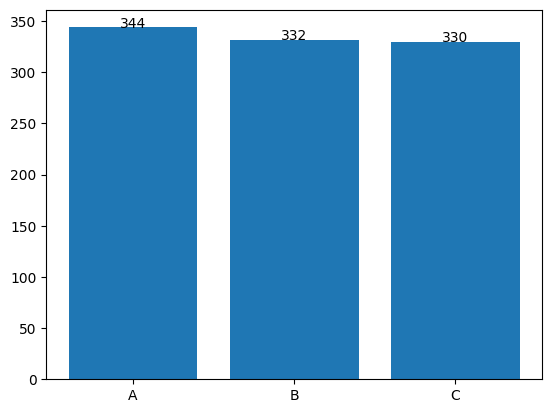

In [358]:
# Let's take a look a the sale count diference between branches
branch_counts=df['Branch'].value_counts()
x=branch_counts.index
y=branch_counts.values
plt.bar(x,y)
for i in range(len(x)):
    plt.text(x = x[i], y = y[i], s = y[i], ha = 'center')
plt.show()


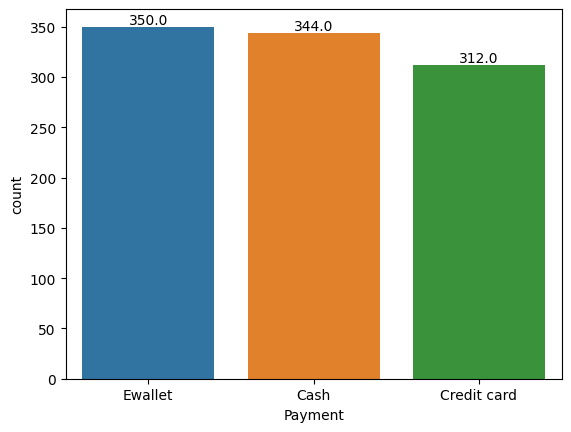

In [359]:
# Let's take a look a the sale count diference between payment types
ax=sns.countplot(x='Payment',data=df)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+3), ha='center')

plt.show()

<AxesSubplot: xlabel='Rating', ylabel='gross income'>

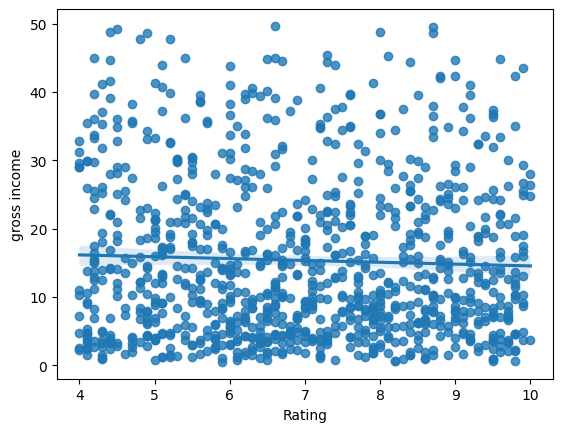

In [360]:
# Relationship between gross income and customer ratings

sns.regplot(x='Rating',y='gross income',data=df)

<AxesSubplot: xlabel='Branch', ylabel='gross income'>

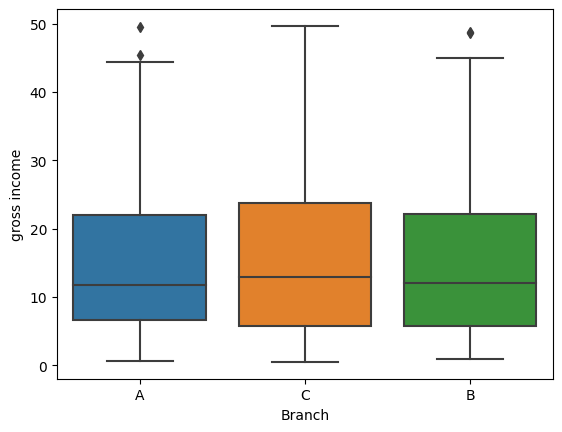

In [361]:
# Relationship between Branch and gross income

sns.boxplot(x='Branch',y='gross income',data=df)

<AxesSubplot: xlabel='Gender', ylabel='gross income'>

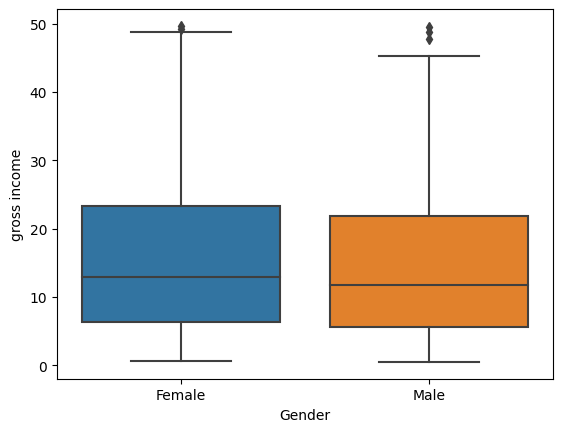

In [362]:
# Relationship between gender and gross income

sns.boxplot(x='Gender',y='gross income',data=df)

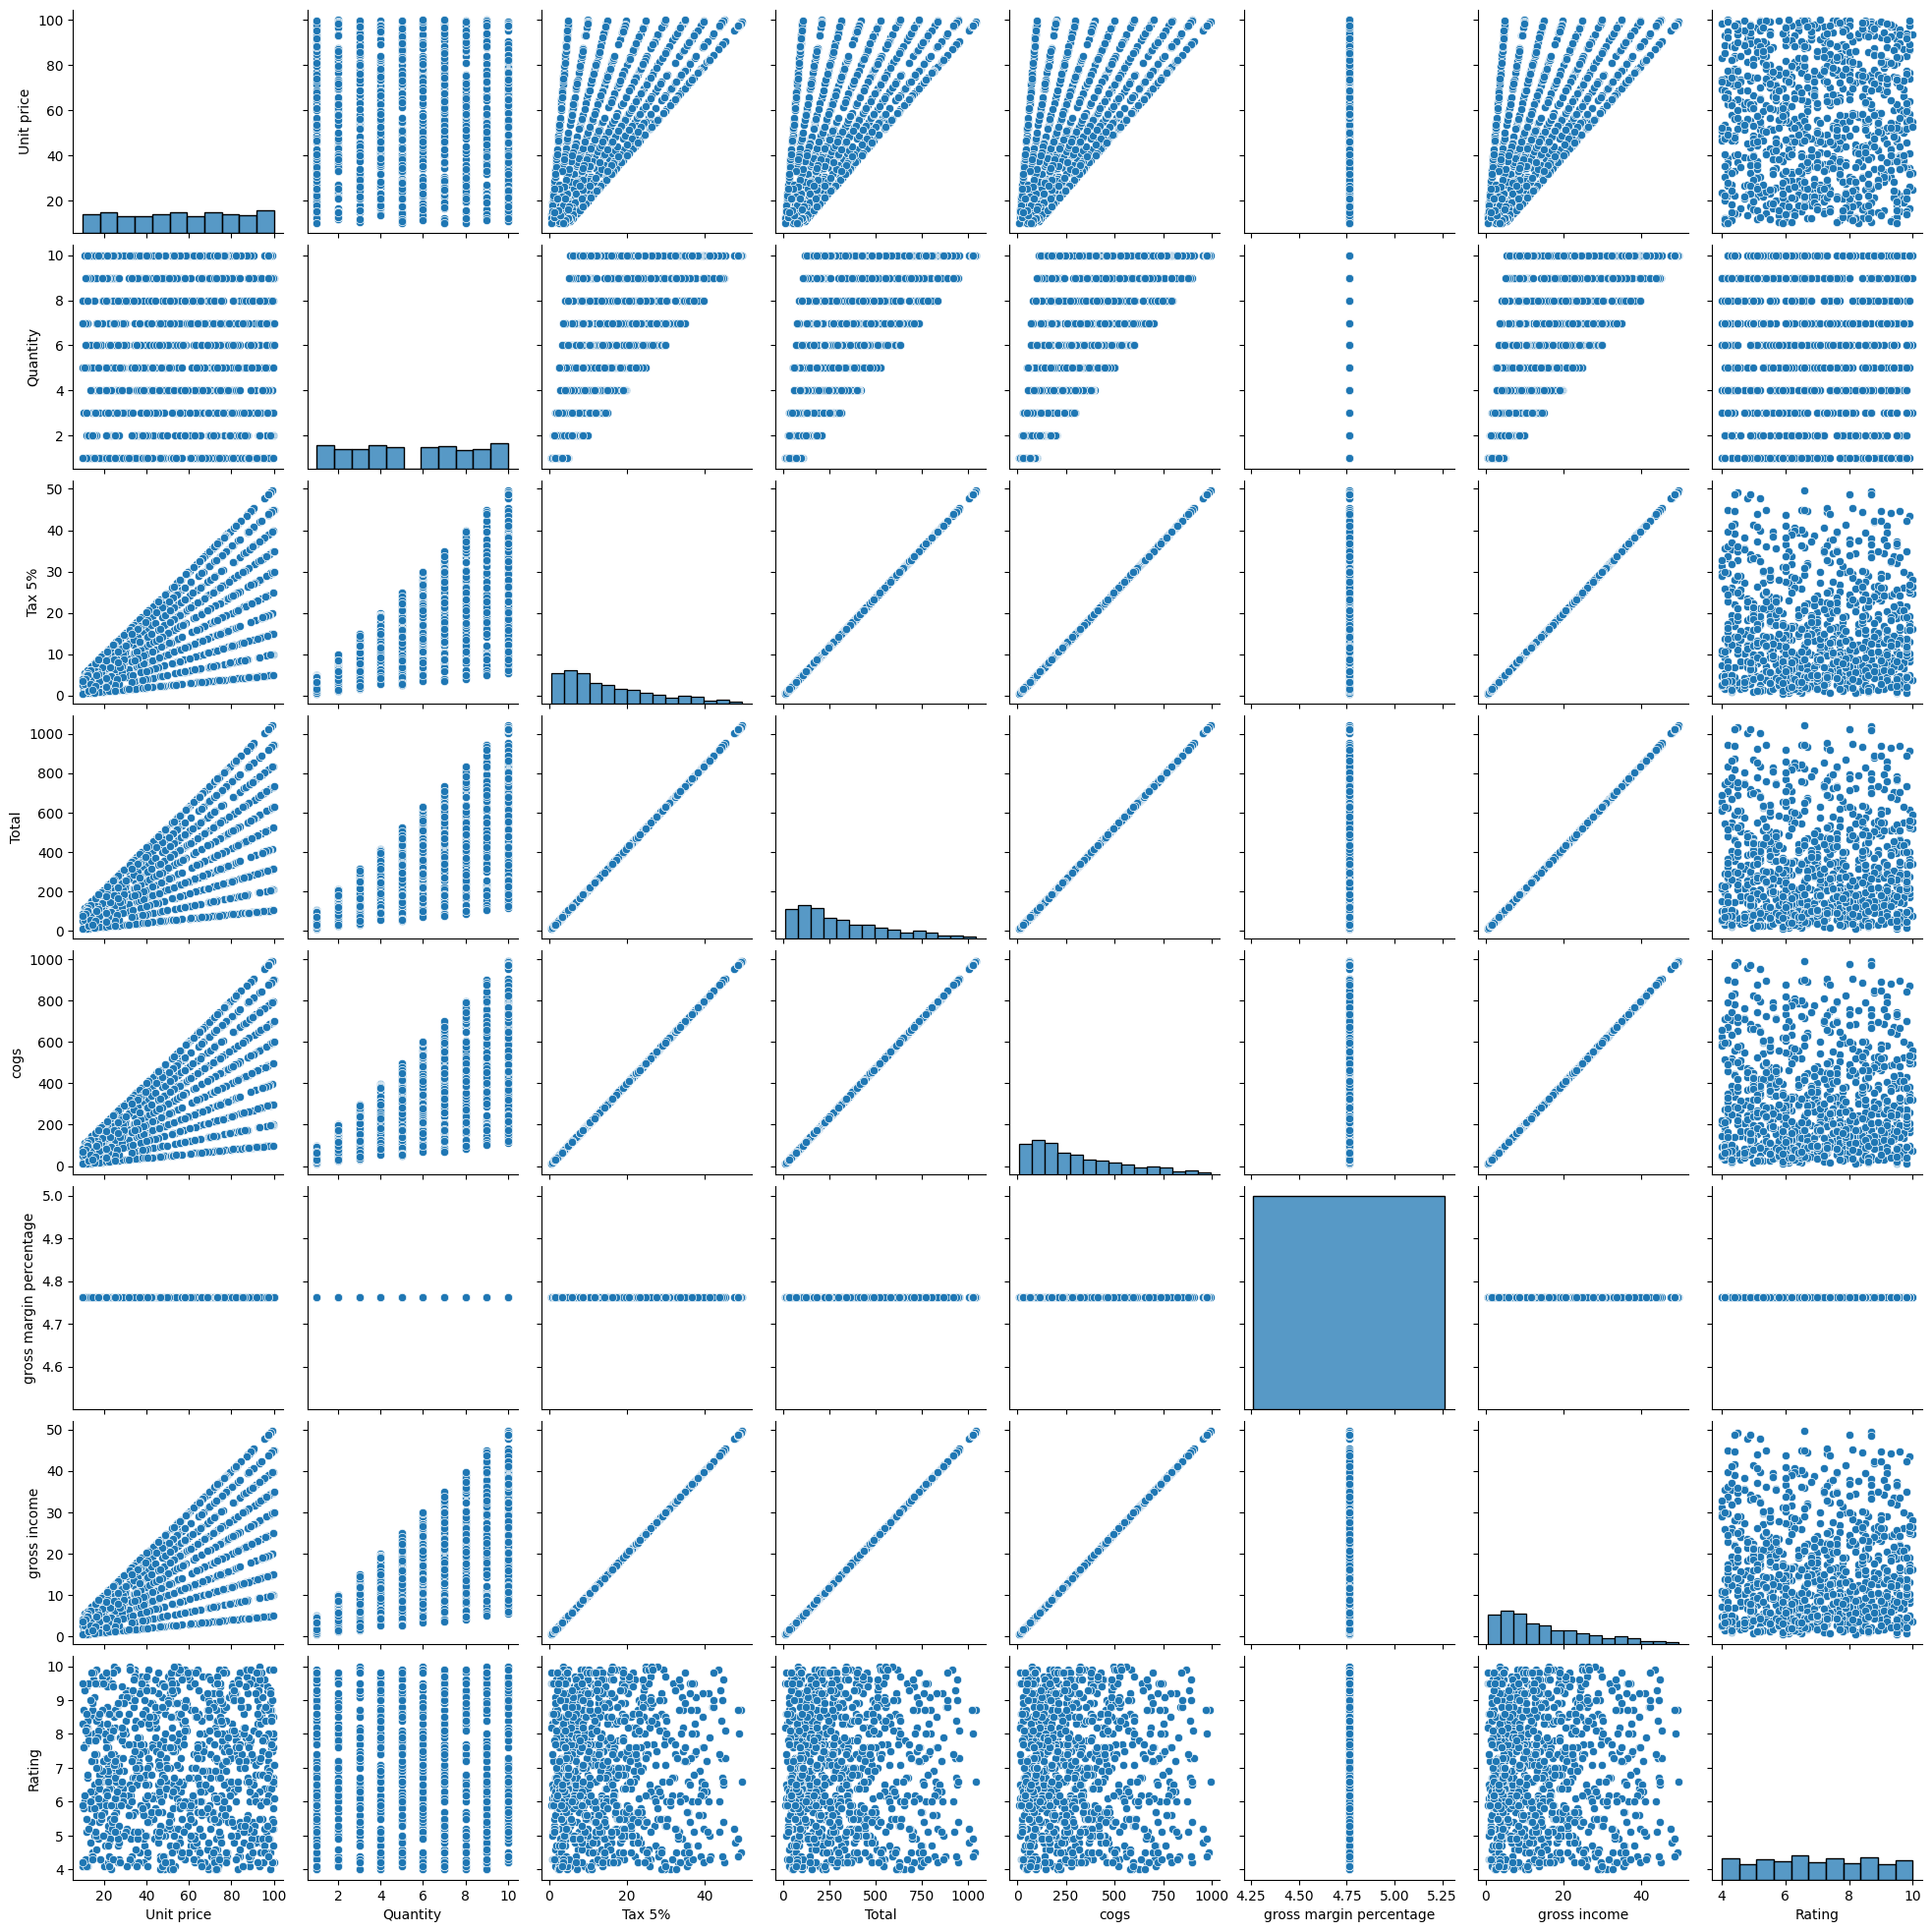

In [ ]:
# Lets plot all the bivariate combinations posible
sns.pairplot(df)

In [ ]:
# Lets look for duplicated rows
df.duplicated().sum()
df[df.duplicated()==True]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3
2019-03-25,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,18:30,Ewallet,597.73,4.761905,29.8865,4.1
2019-02-25,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,14:36,Ewallet,413.04,4.761905,20.6520,5.8
2019-02-24,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,11:38,Ewallet,735.60,4.761905,36.7800,8.0


In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [368]:
# Look for NULL VALUES
df.isna().sum()


Invoice ID                  0
Branch                      0
City                        2
Customer type               0
Gender                      6
Product line                0
Unit price                  3
Quantity                    0
Tax 5%                      0
Total                       1
Time                        1
Payment                     0
cogs                        1
gross margin percentage     0
gross income                1
Rating                     16
dtype: int64

<AxesSubplot: >

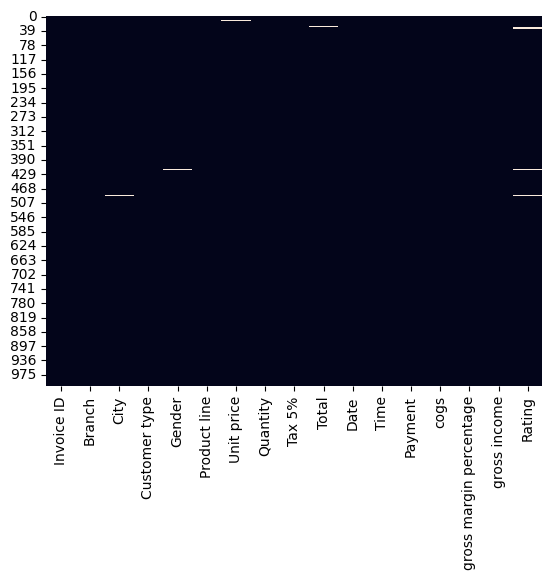

In [385]:
# Missing values Map
sns.heatmap(df.isnull(),cbar=False)

<AxesSubplot: ylabel='Date'>

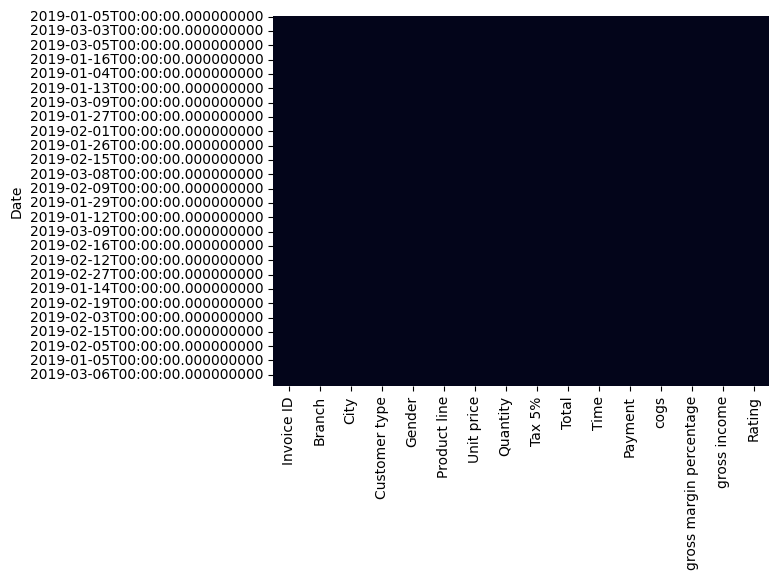

In [374]:
# Lets replace those missing values with the mode for each value
df.fillna(df.mode().iloc[0], inplace=True)
sns.heatmap(df.isnull(),cbar=False)

In [382]:
# Lets take a look at correlations
df=pd.read_csv('supermarket_sales - Sheet1.csv')
np.round(df.corr(),2)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_44744\3828361279.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.round(df.corr(),2)


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.00
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.00,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00


C:\Users\Usuario\AppData\Local\Temp\ipykernel_44744\4075769172.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(np.round(df.corr(),2),annot=True)


<AxesSubplot: >

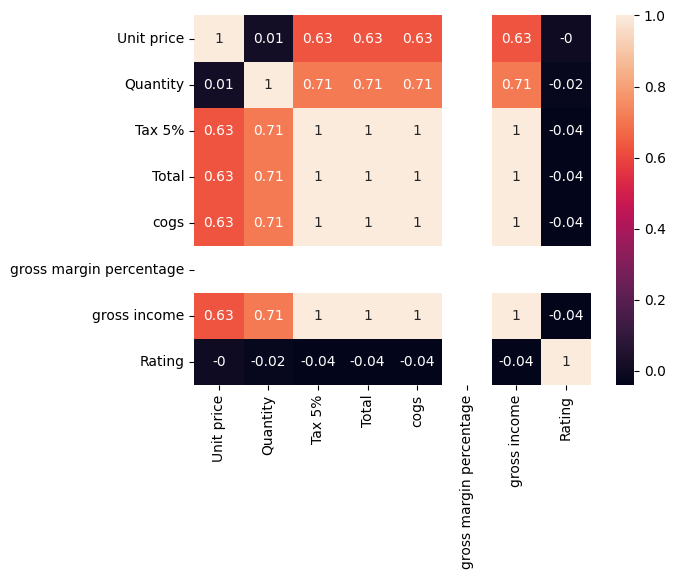

In [386]:
sns.heatmap(np.round(df.corr(),2),annot=True)


In [ ]:
## SOME CONCLUSIONS

# 1) There is a strong positive correlation between the "Quantity," "Tax 5%," "Total," 
# "cogs," and "gross income" variables, which means that as the quantity of products 
# sold increases, the tax, total sales, cost of goods sold, and gross income also increase.

# 2) All of the above-mentioned variables have a perfect correlation with each other, indicating 
# that they are highly dependent on each other.

# 3) There is a moderate positive correlation between the "Unit price" and "Tax 5%," "Total," 
# and "cogs" variables, suggesting that as the unit price of the products sold increases, 
# so does the tax, total sales, and cost of goods sold.

# 4) There is a weak negative correlation between the "Rating" variable and all other variables, 
# indicating that there is no significant relationship between the rating and other sales-related variables in the supermarket company.

# 5) The "gross margin percentage" variable has no correlation with any other variable, indicating 
# that it is independent of other sales-related variables in the supermarket company.